# Histogram Equalization

### imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### main variables

In [2]:
image_path = '../images/hawkes.jpg'

G = 256

### functions

In [3]:
#Source: https://stackoverflow.com/a/42314798

def plotimage(img, title=None, figsize=None):
    h = img.shape[0]
    w = img.shape[1]
    dpi = 80
    if figsize is None:
        figsize = w / float(dpi), h / float(dpi)
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])    
    ax.axis('off')
    ax.imshow(img, cmap='gray')
    if title:
        plt.title(title)
    plt.show()

In [4]:
def histogram(gray):
    hist = np.array([0]*G)
    c=0
    for row in gray:
        for pixel in row:       
            hist[pixel]+=1
    return hist

In [5]:
def plot_histogram(hist, width=0.5, figsize=(15,5), xlabel='Intensity', ylabel='Color', title='Histogram'):
    plt.figure(figsize=figsize)
    plt.bar(list(range(len(hist))),hist,width=width)
    plt.ylabel(xlabel)
    plt.xlabel(ylabel)
    plt.title(title)

    plt.show()

### Read Image

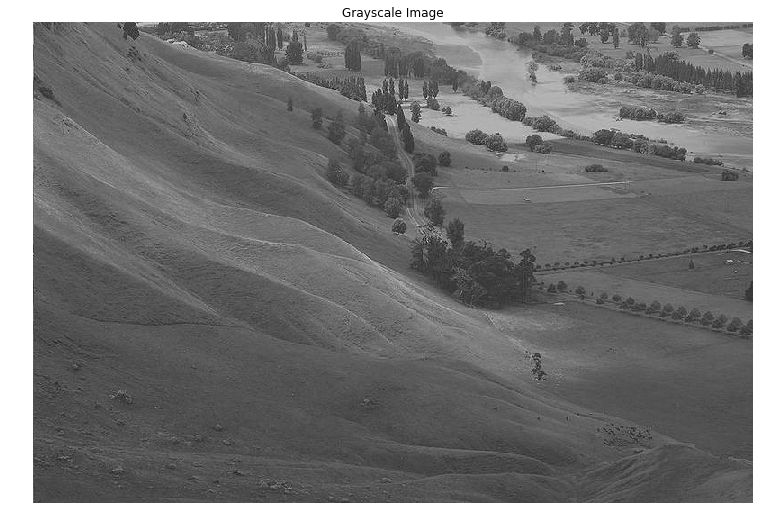

In [6]:
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plotimage(gray, 'Grayscale Image')

### Histogram

In [7]:
hist = histogram(gray)

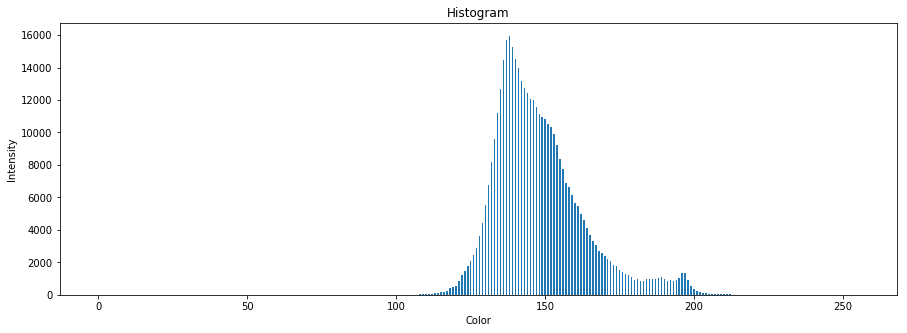

In [8]:
plot_histogram(hist)

### Cumulative Histogram

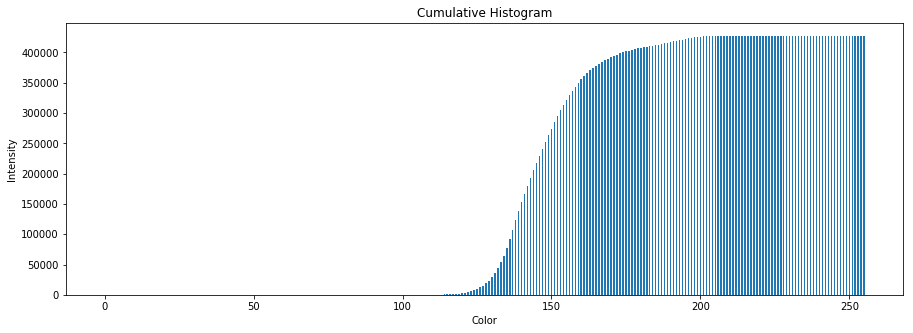

In [9]:
hist_cum = hist.copy()
for i in range(1,len(hist)):
    hist_cum[i]+=hist_cum[i-1]


plot_histogram(hist_cum,title='Cumulative Histogram')

### Equalization

before


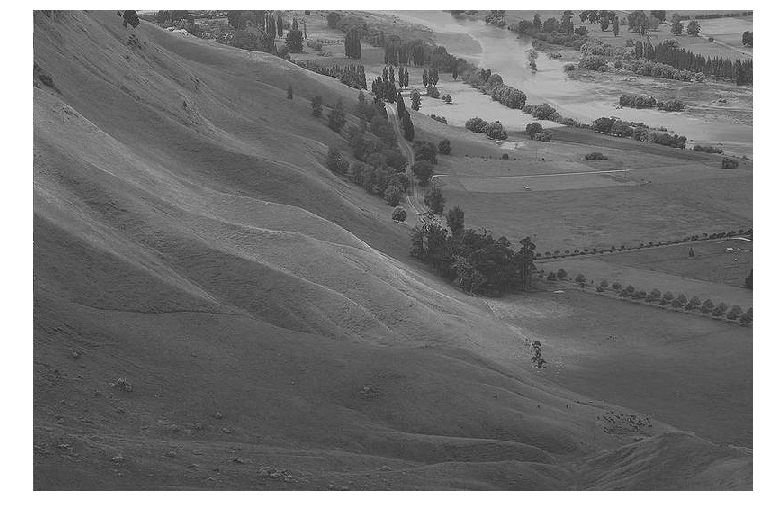

after


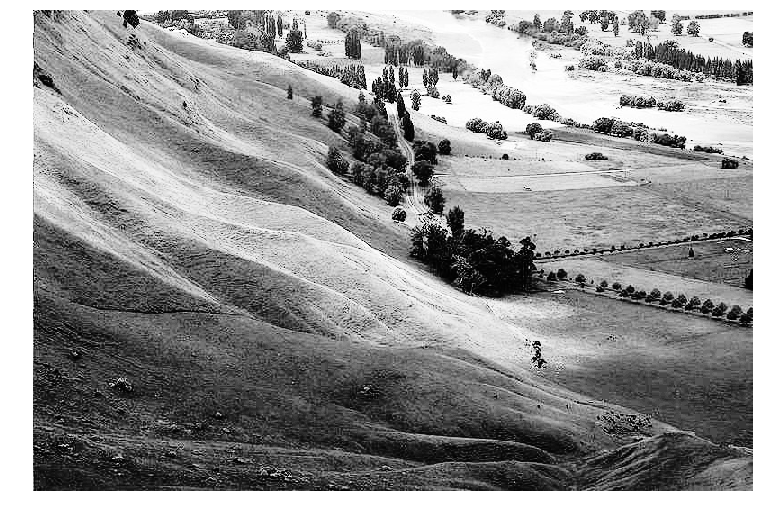

In [10]:
t = np.round((G-1)/(gray.shape[0]*gray.shape[1])*hist_cum)

output = gray.copy()

for i in range(gray.shape[0]):
    for j in range(gray.shape[1]):
        output[i,j] = t[output[i,j]]

print("before")
plotimage(gray)
print("after")
plotimage(output)

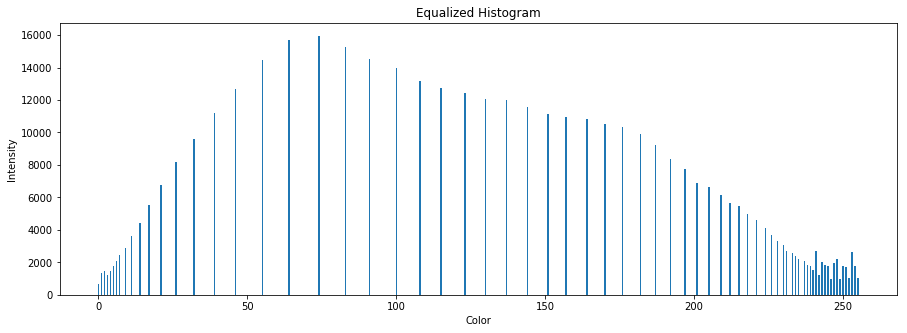

In [11]:
hist_after = histogram(output)
plot_histogram(hist_after, title="Equalized Histogram")